## NLP Assignment - Group 255

| Name | StudentID  | Contribution  | 
|:--|:--|--:|
| AMOGH SINGHAL | 2020SC04081 | 100% |
| ABHAY DATTARAY THAPAN | 2020SC04431 | 100% |
| AKSHIT AGRAWAL | 2020SC04956 | 100% |

### Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

print("Tensorflow Version",tf.__version__)


Tensorflow Version 2.8.2


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### About this file

This is the sentiment140 dataset.
It contains 1,600,000 tweets extracted using the twitter api . 

The tweets have been annotated (0 = negative, 2 = neutral, 4 = positive) and they can be used to detect sentiment .

It contains the following 6 fields:

1. `target`: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

2. `ids`: The id of the tweet ( 2087)

3. `date`: the date of the tweet (Sat May 16 23:58:44 UTC 2009)

4. `flag`: The query (lyx). If there is no query, then this value is NO_QUERY.

5. `user`: the user that tweeted (robotickilldozr)

6. `text`: the text of the tweet (Lyx is cool)

1. Read the .csv file and set it as a Dataframe called text_data. Check the head, info, and describe methods on the Dataframe(3 Marks)

In [2]:
file_path = "/content/drive/MyDrive/NLP-data/training.1600000.processed.noemoticon.csv"
text_data = pd.read_csv(file_path, encoding = 'latin-1')
print("Shape of text data BEFORE: ", text_data.shape)
text_data.dropna(how="any", inplace=True, axis=1)
print("Shape of text data AFTER: ", text_data.shape)
text_data.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
text_data.head()

Shape of text data BEFORE:  (1599999, 6)
Shape of text data AFTER:  (1599999, 6)


,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [3]:
print("Shape of text data: ",text_data.shape)

Shape of text data:  (1599999, 6)


In [4]:
text_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1599999 non-null  int64 
 1   ids     1599999 non-null  int64 
 2   date    1599999 non-null  object
 3   flag    1599999 non-null  object
 4   user    1599999 non-null  object
 5   text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
text_data.groupby('target').describe(include='all')

ids                                                            \
           count unique top freq          mean           std           min   
target                                                                       
0       799999.0    NaN NaN  NaN  2.049458e+09  2.025839e+08  1.467811e+09   
4       800000.0    NaN NaN  NaN  1.948178e+09  1.696291e+08  1.467822e+09   

                                                  ...    text  \
                 25%           50%           75%  ...  unique   
target                                            ...           
0       1.971571e+09  2.057298e+09  2.220801e+09  ...  790184   
4       1.879943e+09  1.985419e+09  2.054322e+09  ...  793506   

                                                                           
                              top freq mean  std  min  25%  50%  75%  max  
target                                                                     
0       isPlayer Has Died! Sorry   210  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4                   good morning   118  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[2 rows x 55 columns]

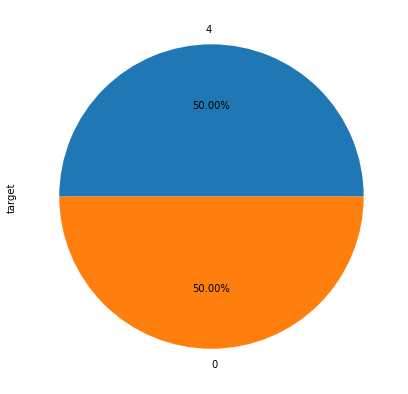

In [6]:
def plot_pie(dataset, target, size=(7,7)):
    return dataset[target].value_counts().plot.pie(autopct = '%1.2f%%', figsize=size)

plot_pie(text_data, 'target')
# The data is fairly balanced. There is a 50-50 ratio for positive and negative sentiments

In [7]:
# There is a 50-50 ratio for positive and negative sentiments
text_data['target'].value_counts()

4    800000
0    799999
Name: target, dtype: int64

In [8]:
# converting numerical sentiment to categories
num_to_emot = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return num_to_emot[label]

text_data['target'] = text_data['target'].apply(lambda x: label_decoder(x))
text_data.head()

,target,ids,date,flag,user,text
0,Negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,Negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,Negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,Negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,Negative,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [9]:
text_data['tweet_len'] = text_data['text'].apply(len)
text_data.head()

,target,ids,date,flag,user,text,tweet_len
0,Negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111
1,Negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89
2,Negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47
3,Negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111
4,Negative,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,29


Text(0.5, 0, 'Tweet Length')

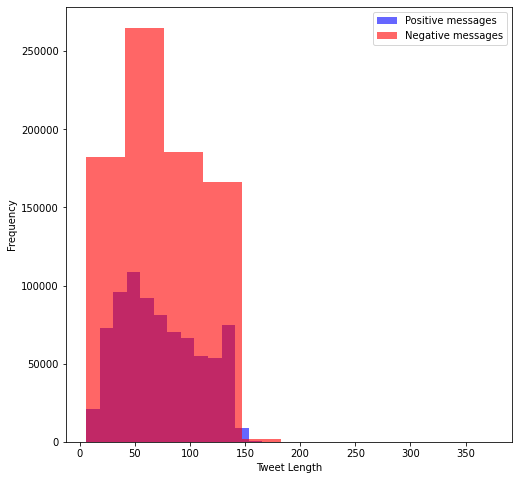

In [10]:
# plotting the relation between the `tweet_length` and `sentiment`
plt.figure(figsize=(8, 8))
text_data[text_data.target=='Positive'].tweet_len.plot(bins=30, kind='hist', color='blue', 
                                       label='Positive messages', alpha=0.6)
text_data[text_data.target=='Negative'].tweet_len.plot(kind='hist', color='red', 
                                       label='Negative messages', alpha=0.6)
plt.legend()
plt.xlabel("Tweet Length")

In [11]:
# Dropping columns which are not required
text_data = text_data.drop(['ids', 'date', 'flag', 'user', 'tweet_len'], axis=1)
text_data.head()

,target,text
0,Negative,is upset that he can't update his Facebook by ...
1,Negative,@Kenichan I dived many times for the ball. Man...
2,Negative,my whole body feels itchy and like its on fire
3,Negative,"@nationwideclass no, it's not behaving at all...."
4,Negative,@Kwesidei not the whole crew


2. Remove punctuations and stopwords from the text in “text” column (2Marks)

In [12]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [13]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [14]:
%%timeit
# takes around 6 min to run
text_data['proc_text'] = text_data['text'].apply(lambda x: preprocess(x))
text_data.head()

1min 2s ± 1.58 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
from collections import Counter

words = text_data[text_data.target=='Positive'].proc_text.apply(lambda x: [word.lower() for word in x.split()])
pos_words = Counter()

for tweet in words:
    pos_words.update(tweet)

print("Most common 50 positive words...")    
print(pos_words.most_common(50))


Most common 50 positive words...
[('good', 62119), ('love', 47713), ('day', 47211), ('quot', 45910), ('like', 37519), ('get', 36506), ('lol', 36127), ('thanks', 34515), ('u', 31937), ('going', 30933), ('time', 30430), ('today', 30101), ('go', 28339), ('got', 28003), ('new', 26943), ('one', 26703), ('amp', 26235), ('see', 25807), ('know', 25735), ('great', 25310), ('back', 23859), ('night', 23572), ('well', 23297), ('haha', 21669), ('morning', 20834), ('happy', 20531), ('im', 19970), ('twitter', 19543), ('work', 19533), ('think', 19527), ('hope', 19212), ('really', 18531), ('fun', 18520), ('2', 18223), ('oh', 17310), ('much', 17025), ('nice', 16972), ('3', 16433), ('home', 15929), ('thank', 15822), ('tomorrow', 14876), ('awesome', 14471), ('watching', 14378), ('still', 14300), ('wait', 14055), ('hey', 14047), ('need', 13667), ('would', 13325), ('last', 13281), ('right', 12812)]


In [16]:
words = text_data[text_data.target=='Negative'].proc_text.apply(lambda x: [word.lower() for word in x.split()])
neg_words = Counter()

for tweet in words:
    neg_words.update(tweet)

print("Most common 50 negative words...")    
print(neg_words.most_common(50))

Most common 50 negative words...
[('go', 45580), ('get', 45542), ('work', 45427), ('like', 41048), ('day', 39864), ('today', 38118), ('going', 33685), ('got', 33289), ('back', 33078), ('really', 31500), ('miss', 30731), ('im', 30662), ('want', 29865), ('still', 29264), ('good', 29206), ('sad', 27918), ('time', 27521), ('one', 27265), ('know', 26314), ('quot', 26162), ('2', 24669), ('home', 24530), ('u', 23997), ('lol', 23137), ('wish', 22461), ('oh', 22456), ('last', 22454), ('amp', 22434), ('need', 22301), ('feel', 21956), ('think', 21880), ('bad', 21725), ('sorry', 20986), ('see', 20557), ('night', 20031), ('much', 20010), ('well', 19484), ('tomorrow', 19245), ('sleep', 18450), ('hate', 17208), ('love', 16999), ('3', 16267), ('new', 15506), ('right', 15070), ('though', 14799), ('hope', 14679), ('sick', 14617), ('would', 14006), ('could', 13837), ('morning', 13771)]


In [17]:
text_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   target     1599999 non-null  object
 1   text       1599999 non-null  object
 2   proc_text  1599999 non-null  object
dtypes: object(3)
memory usage: 36.6+ MB


3. Create two objects X and y. X will be the 'text’ column of Dataframe and y will be the 'target' column. Create a CountVectorizer object and split the data into training and testing sets. Train a MultinomialNB model and Display the confusion Matrix (5 Marks)

In [18]:
X = text_data['proc_text']
y = text_data['target']

In [19]:
X

0          upset update facebook texting might cry result...
1          dived many times ball managed save 50 rest go ...
2                           whole body feels itchy like fire
3                                           behaving mad see
4                                                 whole crew
                                 ...                        
1599994                        woke school best feeling ever
1599995             thewdb com cool hear old walt interviews
1599996                      ready mojo makeover ask details
1599997    happy 38th birthday boo alll time tupac amaru ...
1599998    happy charitytuesday thenspcc sparkscharity sp...
Name: proc_text, Length: 1599999, dtype: object

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
print("Shape of X_train", X_train.shape)
print("Shape of y_train", y_train.shape)

print("Shape of X_test", X_test.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (1071999,)
Shape of y_train (1071999,)
Shape of X_test (528000,)
Shape of y_test (528000,)


In [22]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

text_clf = MultinomialNB()

text_clf

MultinomialNB()

In [23]:
import time

t1 = time.time()
vectorizer = CountVectorizer(ngram_range=(1, 3), 
                             analyzer = 'word', 
                             stop_words='english', 
                             max_df=0.5,
                             min_df=2)

X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

text_clf.fit(X_train_vect, y_train)
t2 = time.time()
print(f"Time taken to run: {(t2-t1)} seconds")

Time taken to run: 63.57471013069153 seconds


In [24]:
from sklearn.metrics import classification_report

preds = text_clf.predict(X_test_vect)
print(classification_report(y_test, preds, digits=2))

              precision    recall  f1-score   support

    Negative       0.76      0.77      0.77    263320
    Positive       0.77      0.76      0.77    264680

    accuracy                           0.77    528000
   macro avg       0.77      0.77      0.77    528000
weighted avg       0.77      0.77      0.77    528000



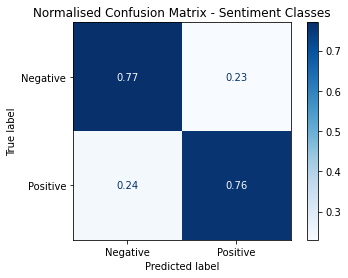

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, 
                      preds, 
                      labels=text_clf.classes_)

cm_norm= np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 
                   decimals=2)


disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm,
                               display_labels=text_clf.classes_)

disp.plot(cmap=plt.cm.Blues, values_format='2g')
plt.title("Normalised Confusion Matrix - Sentiment Classes")
plt.show()

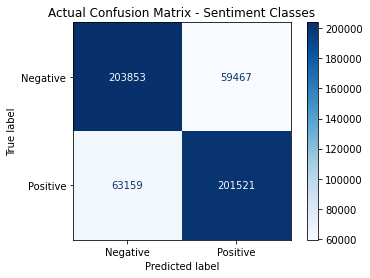

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, 
                      preds, 
                      labels=text_clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=text_clf.classes_)

disp.plot(cmap=plt.cm.Blues, values_format='2g')
plt.title("Actual Confusion Matrix - Sentiment Classes")
plt.show()

4. Display the HMM POS tagging on the first 4 rows of ‘text’ (2 Marks)



In [27]:
#download the treebank corpus from nltk
nltk.download('treebank')
 
#download the universal tagset from nltk
nltk.download('universal_tagset')
 
# reading the Treebank tagged sentences
nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))
 
#print the first two sentences along with tags
for d in nltk_data[-4:]:
  print()
  print(d)


[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!



[('Sen.', 'NOUN'), ('Kennedy', 'NOUN'), ('said', 'VERB'), ('in', 'ADP'), ('a', 'DET'), ('separate', 'ADJ'), ('statement', 'NOUN'), ('that', 'ADP'), ('he', 'PRON'), ('supports', 'VERB'), ('legislation', 'NOUN'), ('0', 'X'), ('*', 'X'), ('to', 'PRT'), ('give', 'VERB'), ('the', 'DET'), ('president', 'NOUN'), ('line-item', 'ADJ'), ('veto', 'NOUN'), ('power', 'NOUN'), ('*T*-2', 'X'), (',', '.'), ('but', 'CONJ'), ('that', 'ADP'), ('it', 'PRON'), ('*EXP*-1', 'X'), ('would', 'VERB'), ('be', 'VERB'), ('a', 'DET'), ('``', '.'), ('reckless', 'ADJ'), ('course', 'NOUN'), ('of', 'ADP'), ('action', 'NOUN'), ("''", '.'), ('for', 'ADP'), ('President', 'NOUN'), ('Bush', 'NOUN'), ('to', 'PRT'), ('claim', 'VERB'), ('the', 'DET'), ('authority', 'NOUN'), ('without', 'ADP'), ('congressional', 'ADJ'), ('approval', 'NOUN'), ('.', '.')]

[('Trinity', 'NOUN'), ('Industries', 'NOUN'), ('Inc.', 'NOUN'), ('said', 'VERB'), ('0', 'X'), ('it', 'PRON'), ('reached', 'VERB'), ('a', 'DET'), ('preliminary', 'ADJ'), ('agre

In [28]:
# print each word with its respective tag for few sentences
for sent in nltk_data[-4:]:
  print("\n *************** \n")
  for word_tup in sent:
    print(word_tup)


 *************** 

('Sen.', 'NOUN')
('Kennedy', 'NOUN')
('said', 'VERB')
('in', 'ADP')
('a', 'DET')
('separate', 'ADJ')
('statement', 'NOUN')
('that', 'ADP')
('he', 'PRON')
('supports', 'VERB')
('legislation', 'NOUN')
('0', 'X')
('*', 'X')
('to', 'PRT')
('give', 'VERB')
('the', 'DET')
('president', 'NOUN')
('line-item', 'ADJ')
('veto', 'NOUN')
('power', 'NOUN')
('*T*-2', 'X')
(',', '.')
('but', 'CONJ')
('that', 'ADP')
('it', 'PRON')
('*EXP*-1', 'X')
('would', 'VERB')
('be', 'VERB')
('a', 'DET')
('``', '.')
('reckless', 'ADJ')
('course', 'NOUN')
('of', 'ADP')
('action', 'NOUN')
("''", '.')
('for', 'ADP')
('President', 'NOUN')
('Bush', 'NOUN')
('to', 'PRT')
('claim', 'VERB')
('the', 'DET')
('authority', 'NOUN')
('without', 'ADP')
('congressional', 'ADJ')
('approval', 'NOUN')
('.', '.')

 *************** 

('Trinity', 'NOUN')
('Industries', 'NOUN')
('Inc.', 'NOUN')
('said', 'VERB')
('0', 'X')
('it', 'PRON')
('reached', 'VERB')
('a', 'DET')
('preliminary', 'ADJ')
('agreement', 'NOUN')
('*

In [29]:
# split data into training and validation set in the ratio 80:20
train_set, test_set = train_test_split(nltk_data,
                                       train_size=0.80,
                                       test_size=0.20,
                                       random_state=2022)

print("Number of records in NLTK data: ", len(nltk_data))
print("Number of records in train_set: ", len(train_set))
print("Number of records in test_set: ", len(test_set))

Number of records in NLTK data:  3914
Number of records in train_set:  3131
Number of records in test_set:  783


In [30]:
# create list of train and test tagged words
train_tagged_words = [ tup for sent in train_set for tup in sent ]

test_tagged_words = [ tup for sent in test_set for tup in sent ]

print("Number of records in train tagged words: ", len(train_tagged_words))
print("Number of records in test tagged words: ", len(test_tagged_words))

Number of records in train tagged words:  80446
Number of records in test tagged words:  20230


In [31]:
# check some of the tagged words.
train_tagged_words[20:30]

[('Cruise', 'NOUN'),
 ('Lines', 'NOUN'),
 ('Inc.', 'NOUN'),
 ('said', 'VERB'),
 ('0', 'X'),
 ('potential', 'ADJ'),
 ('problems', 'NOUN'),
 ('with', 'ADP'),
 ('the', 'DET'),
 ('construction', 'NOUN')]

In [32]:
# use set datatype to check how many unique tags are present in training data
tags = {tag for word,tag in train_tagged_words}
print("Number of unique tags found in training: ", len(tags))
print("Unique training tags are: ", tags)
 
# check total words in vocabulary
vocab = {word for word,tag in train_tagged_words}

Number of unique tags found in training:  12
Unique training tags are:  {'CONJ', 'NUM', 'ADV', 'PRON', 'DET', 'ADJ', '.', 'X', 'PRT', 'NOUN', 'ADP', 'VERB'}


In [33]:
# compute emission Probability
def word_given_tag(word, tag, train_bag = train_tagged_words):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list) 
    # total number of times the passed tag occurred in train_bag
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
    # now calculate the total number of times the passed word occurred as the passed tag.
    count_w_given_tag = len(w_given_tag_list)
 
    return (count_w_given_tag, count_tag)

In [34]:
# compute transition probability
def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)

In [35]:
# creating t x t transition matrix of tags, t = no. of tags
# matrix(i, j) represents P(jth tag after the ith tag)
 
tags_matrix = np.zeros((len(tags), len(tags)), dtype='float32')
for i, t1 in enumerate(list(tags)):
    for j, t2 in enumerate(list(tags)): 
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]
 
print(tags_matrix)

[[5.56173502e-04 4.28253599e-02 5.45050055e-02 5.56173511e-02
  1.17352612e-01 1.14015572e-01 3.44827585e-02 1.00111235e-02
  5.56173548e-03 3.53726357e-01 5.33926599e-02 1.57953277e-01]
 [1.32820690e-02 1.85249910e-01 2.79622502e-03 1.04858447e-03
  3.49528133e-03 3.42537574e-02 1.17790982e-01 1.99580565e-01
  3.04089487e-02 3.57217759e-01 3.53023410e-02 1.95735749e-02]
 [7.15990458e-03 3.54017504e-02 7.55767673e-02 1.55131267e-02
  6.92124069e-02 1.25696108e-01 1.40015915e-01 2.38663480e-02
  1.27287190e-02 3.30151170e-02 1.20525062e-01 3.41288775e-01]
 [6.00739382e-03 7.39371544e-03 3.14232893e-02 6.00739382e-03
  1.06284656e-02 7.53234774e-02 4.20517549e-02 9.28835496e-02
  1.06284656e-02 2.17190385e-01 2.35674679e-02 4.76894647e-01]
 [2.85632676e-04 2.24221647e-02 1.25678377e-02 3.57040856e-03
  5.28420461e-03 2.07226500e-01 1.78520419e-02 4.59868610e-02
  1.42816338e-04 6.35675550e-01 9.56869498e-03 3.94173078e-02]
 [1.66666675e-02 2.13178303e-02 3.68217053e-03 5.81395347e-04
  3

In [36]:
# convert the matrix to a df for better readability
tags_df = pd.DataFrame(tags_matrix, columns = list(tags), index=list(tags))
display(tags_df)

,CONJ,NUM,ADV,PRON,DET,ADJ,.,X,PRT,NOUN,ADP,VERB
CONJ,0.000556,0.042825,0.054505,0.055617,0.117353,0.114016,0.034483,0.010011,0.005562,0.353726,0.053393,0.157953
NUM,0.013282,0.185250,0.002796,0.001049,0.003495,0.034254,0.117791,0.199581,0.030409,0.357218,0.035302,0.019574
ADV,0.007160,0.035402,0.075577,0.015513,0.069212,0.125696,0.140016,0.023866,0.012729,0.033015,0.120525,0.341289
PRON,0.006007,0.007394,0.031423,0.006007,0.010628,0.075323,0.042052,0.092884,0.010628,0.217190,0.023567,0.476895
DET,0.000286,0.022422,0.012568,0.003570,0.005284,0.207226,0.017852,0.045987,0.000143,0.635676,0.009569,0.039417
ADJ,0.016667,0.021318,0.003682,0.000581,0.003488,0.066279,0.066860,0.019186,0.011822,0.699031,0.078876,0.012209
.,0.057665,0.079075,0.055083,0.065304,0.173965,0.046799,0.089941,0.027219,0.002152,0.222378,0.090479,0.089833
X,0.009011,0.003259,0.026649,0.054640,0.055406,0.017255,0.160660,0.075920,0.183090,0.060775,0.144172,0.209164
PRT,0.002709,0.062307,0.010062,0.018576,0.103715,0.086300,0.039861,0.013932,0.002322,0.249226,0.021285,0.389706
NOUN,0.042560,0.009246,0.017024,0.004753,0.013481,0.012401,0.238636,0.028690,0.044677,0.264043,0.178189,0.146301


5. Parse the first 4 rows of ‘text’ using Viterbi Parser [Use toy_pcfg1 and toy_pcfg2 to get the probabilistic context free grammars; use the PCFG suitable for each sentence] (3 marks)

In [37]:
def Viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
     
    for key, word in enumerate(words):
        # initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                 
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
             
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))

In [38]:
import random
# Let's test our Viterbi algorithm on a few sample sentences of test dataset
random.seed(2022)
 
# choose random 10 numbers
rndom = [random.randint(1,len(test_set)) for x in range(10)]
 
# list of 10 sents on which we test the model
test_run = [test_set[i] for i in rndom]
 
# list of tagged words
test_run_base = [tup for sent in test_run for tup in sent]
 
# list of untagged words
test_tagged_words = [tup[0] for sent in test_run for tup in sent]

In [39]:
start = time.time()
tagged_seq = Viterbi(test_tagged_words)
end = time.time()
difference = end-start
 
print("Time taken in seconds: ", difference)
 
# accuracy
check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 
 
accuracy = len(check)/len(tagged_seq)
print('Viterbi Algorithm Accuracy: ',accuracy*100)

Time taken in seconds:  70.64397120475769
Viterbi Algorithm Accuracy:  90.87136929460581


In [40]:
# To improve the performance,we specify a rule base tagger for unknown words 
# specify patterns for tagging
patterns = [
    (r'.*ing$', 'VERB'),              # gerund
    (r'.*ed$', 'VERB'),               # past tense 
    (r'.*es$', 'VERB'),               # verb    
    (r'.*\'s$', 'NOUN'),              # possessive nouns
    (r'.*s$', 'NOUN'),                # plural nouns
    (r'\*T?\*?-[0-9]+$', 'X'),        # X
    (r'^-?[0-9]+(.[0-9]+)?$', 'NUM'), # cardinal numbers
    (r'.*', 'NOUN')                   # nouns
]
 
# rule based tagger
rule_based_tagger = nltk.RegexpTagger(patterns)

In [41]:
# modified Viterbi to include rule based tagger in it
def Viterbi_rule_based(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
     
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                 
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
             
        pmax = max(p)
        state_max = rule_based_tagger.tag([word])[0][1]       
        
         
        if(pmax==0):
            state_max = rule_based_tagger.tag([word])[0][1] # assign based on rule based tagger
        else:
            if state_max != 'X':
                # getting state for which probability is maximum
                state_max = T[p.index(pmax)]                
             
         
        state.append(state_max)
    return list(zip(words, state))

In [42]:
# test accuracy on subset of test data 
start = time.time()
tagged_seq = Viterbi_rule_based(test_tagged_words)
end = time.time()
difference = end-start
 
print("Time taken in seconds: ", difference)
 
# accuracy
check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 
 
accuracy = len(check)/len(tagged_seq)
print('Rule-assisted Viterbi Algorithm Accuracy: ',accuracy*100)

Time taken in seconds:  70.38118529319763
Rule-assisted Viterbi Algorithm Accuracy:  95.850622406639


In [43]:
# Check how a sentence is tagged by the two POS taggers and compare them
test_sent = "I am stopping by the bank"
# test_sent = "my whole body feels itchy and like its on fire"
pred_tags_rule = Viterbi_rule_based(test_sent.split())
pred_tags_withoutRules = Viterbi(test_sent.split())
print("Test sentence is:",test_sent)
print("Rule-assisted Viterbi: ", pred_tags_rule)
print("Vanilla Viterbi: ", pred_tags_withoutRules)


Test sentence is: I am stopping by the bank
Rule-assisted Viterbi:  [('I', 'PRON'), ('am', 'VERB'), ('stopping', 'VERB'), ('by', 'ADP'), ('the', 'DET'), ('bank', 'NOUN')]
Vanilla Viterbi:  [('I', 'PRON'), ('am', 'VERB'), ('stopping', 'CONJ'), ('by', 'ADP'), ('the', 'DET'), ('bank', 'NOUN')]


In [44]:
#import the nltk library
import nltk
#define the text
text = 'Some drivers desert their passengers when they get to the desert'
#define an empty list to store the words and tags
def nltk_pos_tagger(text):

  tags = []
  #tokenize the sentence
  tokenized_sentence = nltk.sent_tokenize(text)
  #loop over the list of sentence
  for tokenized_text in tokenized_sentence:
      #tokenize the sentence into list of words
      tokens = nltk.word_tokenize(tokenized_text)
      #POS tag the words
      tokens = nltk.pos_tag(tokens)
      #Populate each word and its corresponding tag to the list
      tags.append(tokens)   
  return tags

In [45]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# sample 4 random cases to test
sample_cases = text_data.sample(n=4)
display(sample_cases)

# fetch the `text` field
sample_texts = sample_cases["text"].values.tolist()

for ix, tc in enumerate(sample_texts):
  print("\n*************\n")
  print(f"test #{ix}: ", tc)

  pred_tags_rule = Viterbi_rule_based(tc.split())
  pred_tags_withoutRules = Viterbi(tc.split())
  pred_nltk = nltk_pos_tagger(tc)

  print("NLTK POS Tagger: ", pred_nltk)
  print("Rule-assisted Viterbi: ", pred_tags_rule)
  print("Vanilla Viterbi: ", pred_tags_withoutRules)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,target,text,proc_text
618804,Negative,@Nikki_Perry no! can't u come later? i will po...,u come later post story
750396,Negative,"hmmm... i miss my laptop already, i cant go on...",hmmm miss laptop already cant go sims 3 look p...
762566,Negative,@lele2lele yheaa.i found out im leavin THURSDA...,yheaa found im leavin thursday ima let lady to...
972921,Positive,yay people i actually know on twitter!! Alyssa...,yay people actually know twitter alyssa kaleigh



*************

test #0:  @Nikki_Perry no! can't u come later? i will post my story?! 
NLTK POS Tagger:  [[('@', 'NN'), ('Nikki_Perry', 'NNP'), ('no', 'DT'), ('!', '.')], [('ca', 'MD'), ("n't", 'RB'), ('u', 'VB'), ('come', 'VB'), ('later', 'RB'), ('?', '.')], [('i', 'NN'), ('will', 'MD'), ('post', 'VB'), ('my', 'PRP$'), ('story', 'NN'), ('?', '.')], [('!', '.')]]
Rule-assisted Viterbi:  [('@Nikki_Perry', 'NOUN'), ('no!', 'NOUN'), ("can't", 'NOUN'), ('u', 'NOUN'), ('come', 'VERB'), ('later?', 'NOUN'), ('i', 'NOUN'), ('will', 'VERB'), ('post', 'VERB'), ('my', 'PRON'), ('story?!', 'NOUN')]
Vanilla Viterbi:  [('@Nikki_Perry', 'CONJ'), ('no!', 'CONJ'), ("can't", 'CONJ'), ('u', 'CONJ'), ('come', 'VERB'), ('later?', 'CONJ'), ('i', 'CONJ'), ('will', 'VERB'), ('post', 'VERB'), ('my', 'PRON'), ('story?!', 'CONJ')]

*************

test #1:  hmmm... i miss my laptop already, i cant go on the sims 3 or look at the pictures i may not see again 
NLTK POS Tagger:  [[('hmmm', 'NN'), ('...', ':'), ('i',

In [46]:
import nltk
import random

TRAIN_SIZE = 1000
penn_tagset = nltk.corpus.treebank.tagged_sents()[:TRAIN_SIZE]
hmm_tagger = nltk.HiddenMarkovModelTagger.train(penn_tagset)

sent_idx = TRAIN_SIZE + random.randrange(1,10)
sent = nltk.corpus.treebank.sents()[sent_idx]
print("Test Sentence: ", " ".join(sent))
print("Sentence Index: ", sent_idx)

print("\nHMM Tagger: ")
for w,t in hmm_tagger.tag(sent):
  print(w, "-> ", t)

pred_nltk = nltk_pos_tagger(" ".join(sent))

print("\nNLTK Tagger: ")
for w,t in pred_nltk[0]:
  print(w, "-> ", t)



Test Sentence:  The Ministry of International Trade and Industry summoned executives from the companies *-1 to `` make sure 0 they understood '' the concern about such practices , according to a government spokesman .
Sentence Index:  1007

HMM Tagger: 
The ->  DT
Ministry ->  NNP
of ->  IN
International ->  NNP
Trade ->  NNP
and ->  CC
Industry ->  NNP
summoned ->  POS
executives ->  NNS
from ->  IN
the ->  DT
companies ->  NNS
*-1 ->  -NONE-
to ->  TO
`` ->  ``
make ->  VBP
sure ->  VBN
0 ->  -NONE-
they ->  PRP
understood ->  .
'' ->  ''
the ->  DT
concern ->  NN
about ->  IN
such ->  JJ
practices ->  NNS
, ->  ,
according ->  VBG
to ->  TO
a ->  DT
government ->  NN
spokesman ->  NN
. ->  .

NLTK Tagger: 
The ->  DT
Ministry ->  NNP
of ->  IN
International ->  NNP
Trade ->  NNP
and ->  CC
Industry ->  NNP
summoned ->  VBD
executives ->  NNS
from ->  IN
the ->  DT
companies ->  NNS
* ->  VBP
-1 ->  RB
to ->  TO
`` ->  ``
make ->  VB
sure ->  JJ
0 ->  CD
they ->  PRP
understood ->  V